<a href="https://colab.research.google.com/github/ladrianx/SQL/blob/main/Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Movimiento Browniano

El movimiento browniano con deriva puede expresarse con la ecuación diferencial estocástica
$$
dX_t = \mu dt + \sigma dW_t
$$
donde:
* $ \mu $ es el coeficiente de deriva,
* $ \sigma $ es el coeficiente de volatilidad,
* $ dW_t $ es el incremento del movimiento Browniano.


Para deducir la fórmula del movimiento Browniano con deriva utilizando la fórmula de Itô dividimos el intervalo de tiempo $ [0, T] $ en $ N $ subintervalos de tamaño $ h = \frac{T}{N} $. En cada intervalo $ [t_i, t_{i+1}] $, el cambio en el proceso $ X_t $ es:

$$
X_{i+1} - X_i = \int_{t_i}^{t_{i+1}} \mu \, ds + \int_{t_i}^{t_{i+1}} \sigma \, dW_s
$$

Evaluando las integrales:

1. La integral de la deriva es:

$$
\int_{t_i}^{t_{i+1}} \mu \, ds = \mu \cdot (t_{i+1} - t_i) = \mu \cdot h
$$

2. La integral del movimiento Browniano es:

$$
\int_{t_i}^{t_{i+1}} \sigma \, dW_s = \sigma \cdot (W_{i+1} - W_i)
$$

Donde $ W_{i+1} - W_i \approx \sqrt{h} \cdot y_i $, con $ y_i \sim \mathcal{N}(0,1) $.

Sustituyendo estas integrales en la ecuación del cambio de $ X $:

$$
X_{i+1} - X_i = \mu \cdot h + \sigma \cdot \sqrt{h} \cdot y_i
$$

Por lo tanto, la fórmula del movimiento Browniano con deriva es:

$$
X^{h}(t_{i+1}) = X^{h}(t_i) + \mu \cdot h + \sigma \cdot \sqrt{h} \cdot y_i
$$

donde $ y_i \sim \mathcal{N}(0,1) $.

A continuación implementamos la fórmula del movimiento Browniano en Python tomando $T=1$, $N=1000$, $\mu = 0.05$ y $\sigma =1$

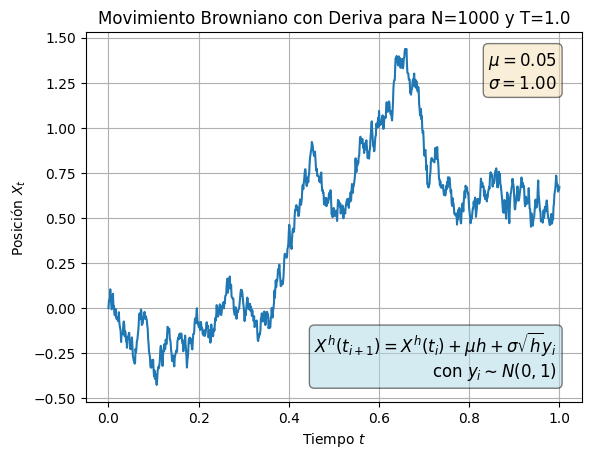

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 1.0       # Tiempo total
N = 1000       # Número de pasos
h = T / N     # Tamaño del paso (h)
t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T

# Parámetros del movimiento Browniano con deriva
mu = 0.05     # Deriva
sigma = 1.0   # Volatilidad

# Inicializamos el movimiento Browniano con deriva en t0
X = np.zeros(N+1)

# Generamos los incrementos del Browniano con deriva
for i in range(1, N+1):
    y_i = np.random.normal(0, 1)  # y_i ~ N(0, 1)
    X[i] = X[i-1] + mu * h + sigma * np.sqrt(h) * y_i

# Graficar el camino simulado del movimiento Browniano con deriva
plt.plot(t, X)
plt.title(f'Movimiento Browniano con Deriva para N={N} y T={T}')
plt.xlabel('Tiempo $t$')
plt.ylabel('Posición $X_t$')

# Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^{h}(t_{i+1}) = X^{h}(t_i)+\mu h+\sigma\sqrt{h}y_i$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()


A continuación podemos observar 20 trayectorias con $\mu =0$ y $\sigma =1$

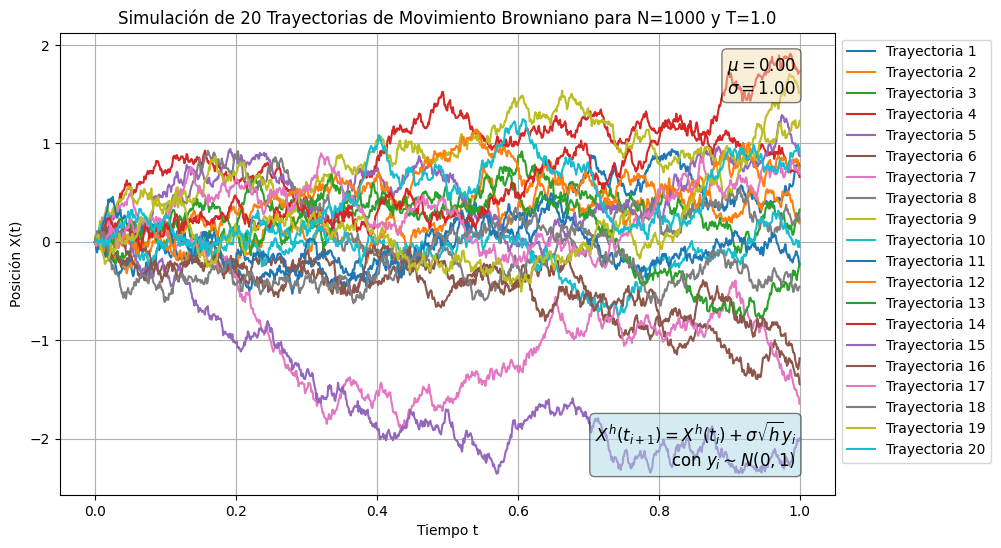

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 1.0       # Tiempo total
N = 1000       # Número de pasos
h = T / N     # Tamaño del paso (h)
t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T

# Parámetros del movimiento Browniano con deriva
mu = 0     # Deriva
sigma = 1.0   # Volatilidad
num_trayectorias = 20  # Número de trayectorias

# Inicializar la figura
plt.figure(figsize=(10, 6))

# Generamos y graficamos las trayectorias
for j in range(num_trayectorias):
    X = np.zeros(N+1)  # Inicializamos el proceso en t0 para cada trayectoria
    for i in range(1, N+1):
        y_i = np.random.normal(0, 1)  # y_i ~ N(0, 1)
        X[i] = X[i-1] + mu * h + sigma * np.sqrt(h) * y_i
    plt.plot(t, X, label=f'Trayectoria {j+1}')

# Personalización del gráfico
plt.title(f'Simulación de {num_trayectorias} Trayectorias de Movimiento Browniano para N={N} y T={T}')
plt.xlabel('Tiempo t')
plt.ylabel('Posición X(t)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^{h}(t_{i+1}) = X^{h}(t_i)+\sigma\sqrt{h}y_i$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()



## 2. Movimiento Browniano Geométrico

Consideramos la ecuación diferencial estocástica (EDE) para el movimiento Browniano geométrico:

$$
dX_t = \mu X_t \, dt + \sigma X_t \, dW_t
$$

donde $ \mu $ es la deriva y $\sigma $ es la volatilidad. Queremos encontrar la solución para $ X_t $.

Multiplicamos ambos lados de la EDE por $ e^{-\mu t} $:

$$
e^{-\mu t} dX_t = e^{-\mu t} \mu X_t \, dt + e^{-\mu t} \sigma X_t \, dW_t
$$

Observamos que:

$$
e^{-\mu t} dX_t = d \left( e^{-\mu t} X_t \right) - X_t (-\mu e^{-\mu t}) \, dt
$$

Así que la integral se convierte en:

$$
d \left( e^{-\mu t} X_t \right) = e^{-\mu t} \sigma X_t \, dW_t
$$

Integramos ambos lados desde 0 hasta $ t $:

$$
e^{-\mu t} X_t - e^{-\mu 0} X_0 = \sigma \int_0^t e^{-\mu s} X_s \, dW_s
$$

Como $ e^{-\mu 0} = 1 $:

$$
e^{-\mu t} X_t = X_0 + \sigma \int_0^t e^{-\mu s} X_s \, dW_s
$$


Para resolver la integral estocástica, usamos la fórmula de Itô. La integral estocástica:

$$
\int_0^t e^{-\mu s} X_s \, dW_s
$$

es conocida y se puede expresar en términos de $ W_t $. Resolviendo esta integral y simplificando, obtenemos:

$$
e^{-\mu t} X_t = X_0 + \sigma \int_0^t e^{-\mu s} X_s \, dW_s
$$

La integral estocástica es proporcional a $ W_t $ y la solución general es:

$$
X_t = X_0 \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma W_t \right)
$$

Para simular un movimiento Browniano geométrico en el intervalo $[0, T]$, dado $N \in \mathbb{N}$ y $h = \frac{T}{N}$:

* Inicializamos: $X^h(t_0) = X_0$
* Para $i = 1, \ldots, N$:
$$
  X^h(t_{i+1}) = X^h(t_i) \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) h + \sigma \sqrt{h} \, y_i \right)
$$
donde $y_i \sim \mathcal{N}(0, 1)$.

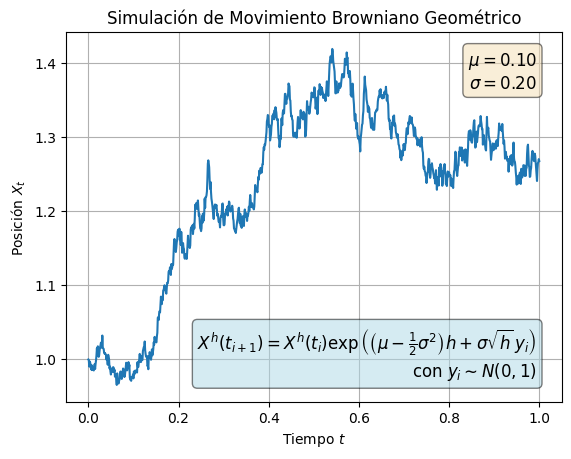

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 1.0       # Tiempo total
N = 1000       # Número de pasos
h = T / N     # Tamaño del paso (h)
t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T

# Parámetros del movimiento Browniano geométrico
mu = 0.10     # Deriva
sigma = 0.20   # Volatilidad
X0 = 1    # Valor inicial

# Fijar la semilla para hacer la simulación reproducible
np.random.seed(22)

# Inicializamos el movimiento Browniano geométrico
X = np.zeros(N+1)
X[0] = X0

# Generamos las trayectorias del movimiento Browniano geométrico
for i in range(1, N+1):
    y_i = np.random.normal(0, 1)  # y_i ~ N(0, 1)
    X[i] = X[i-1] * np.exp((mu - 0.5 * sigma**2) * h + sigma * np.sqrt(h) * y_i)

# Graficar la trayectoria simulada del movimiento Browniano geométrico
plt.plot(t, X)
plt.title('Simulación de Movimiento Browniano Geométrico')
plt.xlabel('Tiempo $t$')
plt.ylabel('Posición $X_t$')

# Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^h(t_{i+1}) = X^h(t_i) \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) h + \sigma \sqrt{h} \, y_i \right)$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()


Ahora aproximamos la ecuación diferencial estocástica usando el método de Euler. Para un pequeño incremento de tiempo $h$ tenemos que
$$
X^h(t_{i+1}) = X^h(t_i) +\mu h X^h(t_i) + \sqrt{h}\sigma X^h(t_i)y_i
$$
donde $y_i \sim \mathcal{N}(0, 1)$.

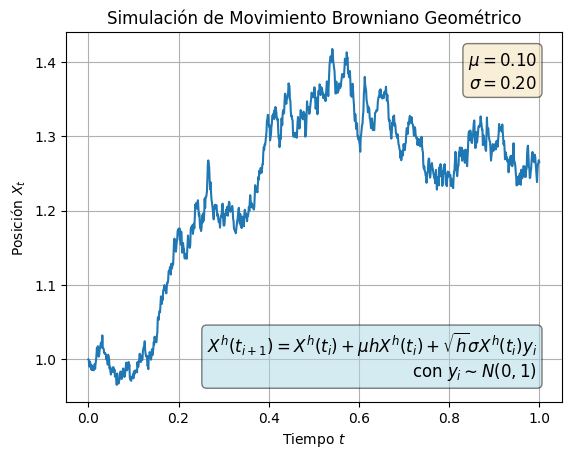

In [172]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 1.0        # Tiempo total
N = 1000       # Número de pasos
h = T / N      # Tamaño del paso
t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T

# Parámetros del movimiento Browniano geométrico
mu = 0.1       # Tasa de crecimiento (drift)
sigma = 0.2    # Volatilidad
X0 = 1.0       # Valor inicial X(0)

# Fijar la semilla para hacer la simulación reproducible
np.random.seed(22)

# Inicializamos el proceso geométrico con X(0) = X0
X = np.zeros(N+1)
X[0] = X0

# Generamos el proceso mediante el método de Euler-Maruyama ajustado
for i in range(1, N+1):
    y_i = np.random.normal(0, 1)         # y_i ~ N(0, 1)
    dW = np.sqrt(h) * y_i                # Incremento browniano ajustado
    X[i] = X[i-1] + mu * X[i-1] * h + sigma * X[i-1] * dW

# Graficar el camino simulado del movimiento Browniano geométrico
plt.plot(t, X)
plt.title('Simulación de Movimiento Browniano Geométrico')
plt.xlabel('Tiempo $t$')
plt.ylabel('Posición $X_t$')
# Añadir un cuadro con los parámetros de la simulación (deriva y volatilidad)
textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^h(t_{i+1}) = X^h(t_i) +\mu h X^h(t_i) + \sqrt{h}\sigma X^h(t_i)y_i$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()

## 3. Proceso de Ornstein-Uhlenbeck

Consideramos la ecuación diferencial estocástica (EDE) del Proceso de Ornstein-Uhlenbeck:

$$
dX_t = -c X_t \, dt + \sigma \, dW_t
$$

donde:
* $X_t$ es el proceso a modelar,
* $c > 0$ es el coeficiente de velocidad de reversión,
* $\sigma$ es la volatilidad, y
* $W_t$ es el movimiento Browniano estándar.

Aplicamos la fórmula de Itô:

$$
df(X_t, t) = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial X_t} dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial X_t^2} (dX_t)^2
$$

Para resolver esta EDE, utilizamos el método del factor integrante. Multiplicamos ambos lados de la ecuación por $e^{ct}$:

$$
e^{ct} \, dX_t = e^{ct} \, (-c X_t \, dt + \sigma \, dW_t)
$$

Lo que simplifica a:

$$
d(e^{ct} X_t) = \sigma e^{ct} \, dW_t
$$

A continuación, integramos ambos lados desde $t_0$ hasta $t$:

$$
e^{ct} X_t = X_0 + \sigma \int_0^t e^{cs} \, dW_s
$$

Multiplicando por $e^{-ct}$ para despejar $X_t$:

$$
X_t = X_0 e^{-ct} + \sigma e^{-ct} \int_0^t e^{cs} \, dW_s
$$
de donde obtenmos
$$
X_t = X_0 e^{-ct} + \sigma \int_0^t e^{-c(t-s)} \, dW_s
$$

Esta es la solución de la EDE de Ornstein-Uhlenbeck.

A continuación hacemos una simulación del proceso usando el método de Euler

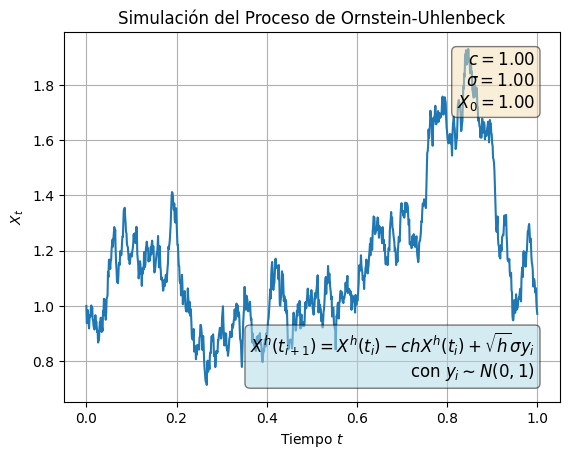

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
T = 1.0         # Tiempo total
N = 1000        # Número de pasos
h = T / N       # Tamaño del paso
t = np.linspace(0, T, N+1)  # Puntos de tiempo desde 0 hasta T

# Parámetros del Proceso de Ornstein-Uhlenbeck
c = 1.0         # Velocidad de reversión
sigma = 1.0     # Volatilidad
X0 = 1.0        # Valor inicial X(0)

# Inicializamos el proceso en X(0) = X0
X = np.zeros(N+1)
X[0] = X0

# Simulación del proceso usando el método de Euler
np.random.seed(969991)  # Semilla para reproducibilidad
for i in range(1, N+1):
    y_i = np.random.normal(0, 1)        # y_i ~ N(0, 1)
    dW = np.sqrt(h) * y_i               # Incremento browniano
    X[i] = X[i-1] + -c * X[i-1] * h + sigma * dW

# Graficar el camino simulado del Proceso de Ornstein-Uhlenbeck
plt.plot(t, X)#, label='Proceso de Ornstein-Uhlenbeck')
plt.title('Simulación del Proceso de Ornstein-Uhlenbeck')
plt.xlabel('Tiempo $t$')
plt.ylabel('$X_t$')
plt.grid(True)

# Añadir cuadro con los parámetros de la simulación
textstr = '\n'.join((
    r'$c=%.2f$' % (c, ),
    r'$\sigma=%.2f$' % (sigma, ),
    r'$X_0=%.2f$' % (X0, )))

# Añadir otro cuadro con la ecuación de la simulación
equation_str = (r'$X^h(t_{i+1}) = X^h(t_i) -c h X^h(t_{i}) + \sqrt{h}\sigma y_i$'
                '\n' r'con $y_i\sim {N}(0,1)$')

# Configuraciones de los cuadros de texto
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
props2 = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)

# Colocamos el texto con los parámetros en la esquina superior derecha
plt.text(0.95, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props1)

# Colocamos el texto con la ecuación en la esquina inferior derecha
plt.text(0.95, 0.05, equation_str, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props2)

plt.grid(True)
plt.show()
